In [20]:
import pandas as pd
import statsmodels.api as sm

# 데이터셋 불러오기
mtcars = sm.datasets.get_rdataset('mtcars').data

# 변수 설정
x = mtcars[['hp', 'wt']]
y = mtcars['mpg']

# 상수항 추가
X = sm.add_constant(x)

# 모델 생성
model = sm.OLS(y, X)

# 모델 학습
result = model.fit()

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           9.11e-12
Time:                        16:11:54   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.0

## 선형성

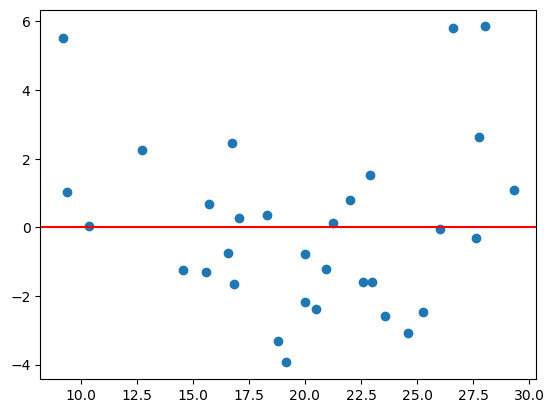

In [33]:
import matplotlib.pyplot as plt

fitted_values = result.fittedvalues
residual = result.resid
plt.scatter(fitted_values, residual)
plt.axhline(y=0, color='red')
plt.show()

## 독립성

In [41]:
statistic = sm.stats.durbin_watson(residual)
print(f'통계량 : {statistic}')

통계량 : 1.362399272951031


## 등분산성

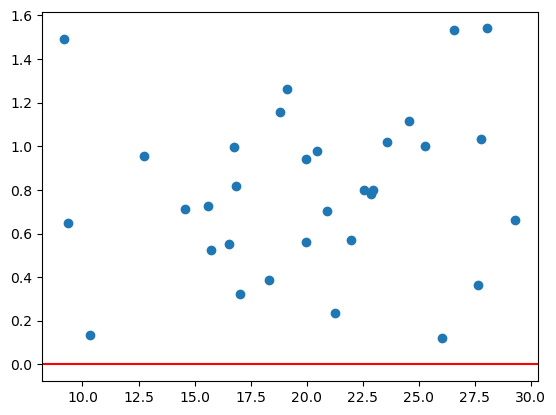

In [48]:
import numpy as np
from scipy import stats

sr = stats.zscore(residual)

plt.scatter(fitted_values, np.sqrt(np.abs(sr)))
plt.axhline(color='red', y=0)
plt.show()

## 정규성

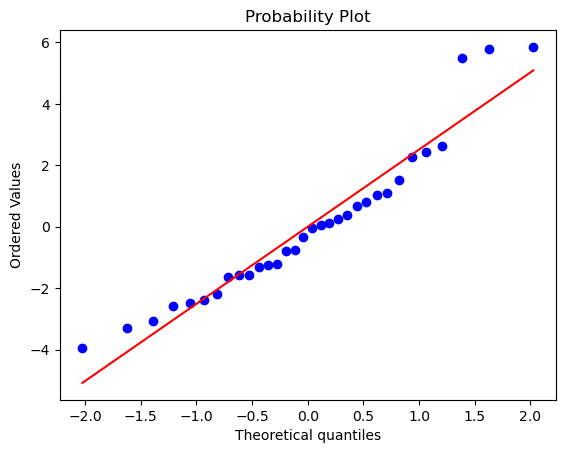

In [49]:
stats.probplot(residual, plot=plt)
plt.show()